In [1]:
# Loading nescessary Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Loading Dataset
path = "/content/drive/MyDrive/ottdata.csv"
data = pd.read_csv(path)

In [3]:
# Keeping copy of the data
df = data.copy()

# **Data Overview**

In [4]:
df.shape

(1000, 8)

In [5]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [6]:
# 1st 5 rows
df.head()

visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  views_content  
0          56.70           0.51  
1          52.69           0.32  
2          48.74           0.39  
3          49.81           0.44  
4          55.83           0.46

In [7]:

# Statistical Summary
df.describe()

visitors  ad_impressions  major_sports_event  views_trailer  \
count  1000.000000     1000.000000         1000.000000     1000.00000   
mean      1.704290     1434.712290            0.400000       66.91559   
std       0.231973      289.534834            0.490143       35.00108   
min       1.250000     1010.870000            0.000000       30.08000   
25%       1.550000     1210.330000            0.000000       50.94750   
50%       1.700000     1383.580000            0.000000       53.96000   
75%       1.830000     1623.670000            1.000000       57.75500   
max       2.340000     2424.200000            1.000000      199.92000   

       views_content  
count    1000.000000  
mean        0.473400  
std         0.105914  
min         0.220000  
25%         0.400000  
50%         0.450000  
75%         0.520000  
max         0.890000

In [8]:
# statistical categorical summary
df.describe(include='object').T

count unique     top freq
genre      1000      8  Others  255
dayofweek  1000      7  Friday  369
season     1000      4  Winter  257

In [9]:
# Checking Null values
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

# 1.Univariate Data Analysis
1.1 Visitors Distribution

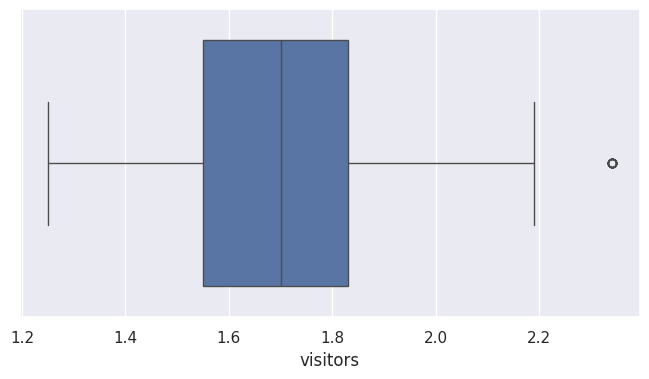

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="visitors")
plt.show()

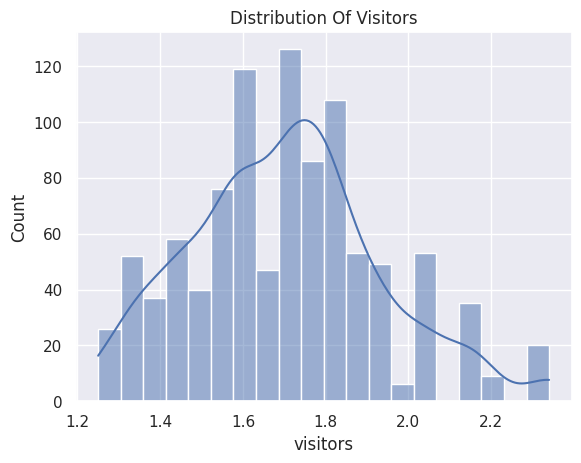

In [11]:
sns.histplot(data=df, x="visitors", kde= True)
plt.title("Distribution Of Visitors")
plt.show()

**1.2. Trailer Views distribution**

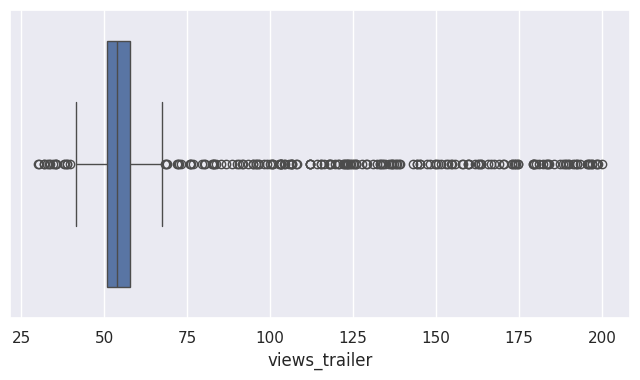

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="views_trailer")
plt.show()

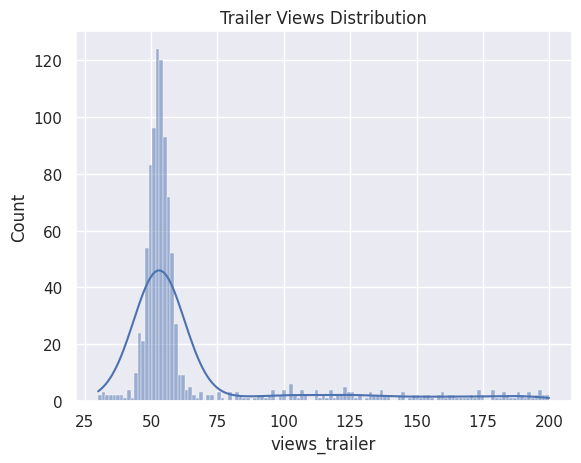

In [13]:
sns.histplot(data=df, x="views_trailer", kde= True)
plt.title("Trailer Views Distribution")
plt.show()

**1.3. Content Views Distribution**

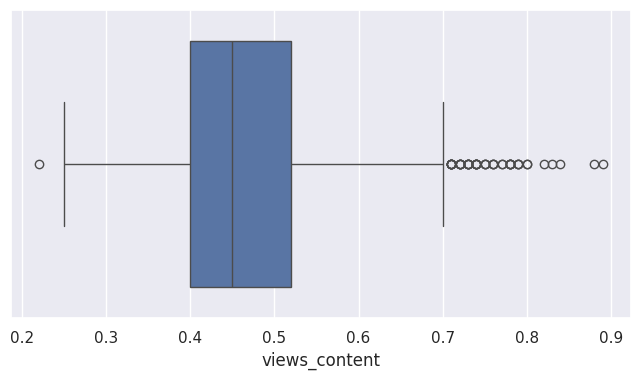

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="views_content")
plt.show()

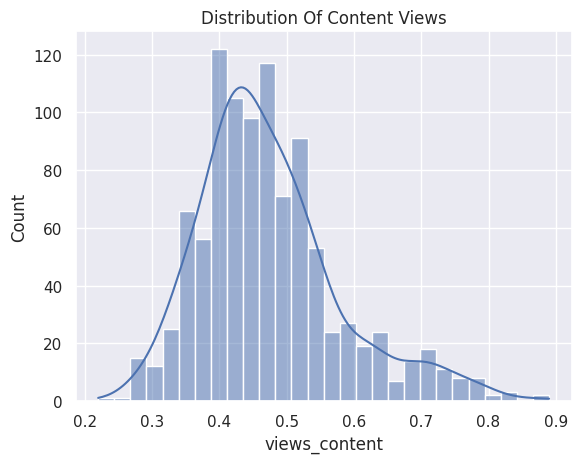

In [15]:
sns.histplot(data=df, x="views_content", kde=True)
plt.title("Distribution Of Content Views")
plt.show()

**1.4. Genre Distribution**

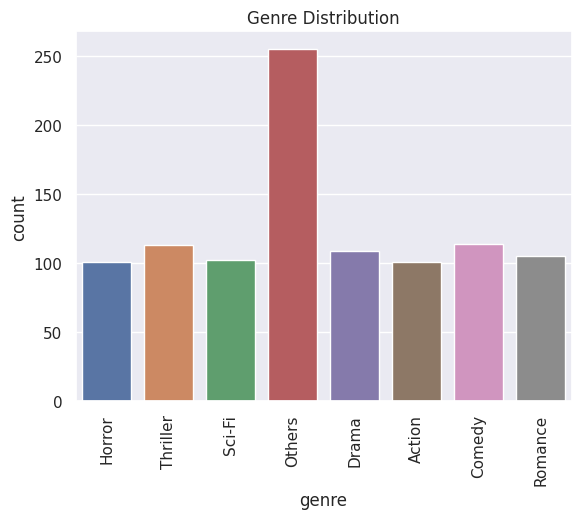

In [16]:
sns.countplot(data=df, x="genre", hue="genre")
plt.title("Genre Distribution")
plt.xticks(rotation=90)
plt.show()

1.5. Weekday Distribution

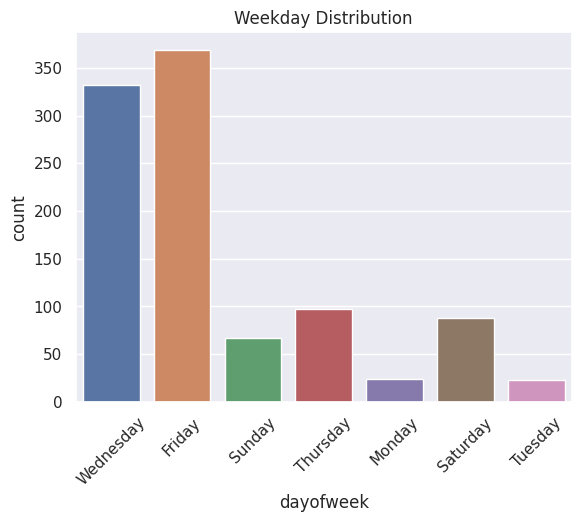

In [17]:
sns.countplot(data=df, x="dayofweek", hue="dayofweek")
plt.title("Weekday Distribution")
plt.xticks(rotation=45)
plt.show()

**1.6. Season Distribution**  

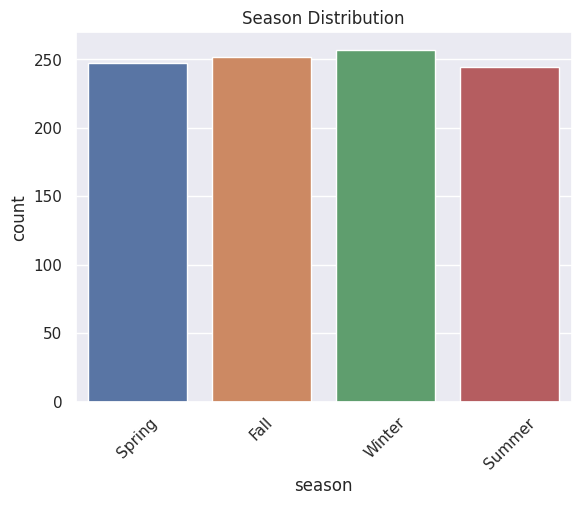

In [18]:
sns.countplot(data=df, x="season", hue="season")
plt.title("Season Distribution")
plt.xticks(rotation=45)
plt.show()

# **2. Bivariate Data Analysis**

**2.1 Correlation between numerical values**

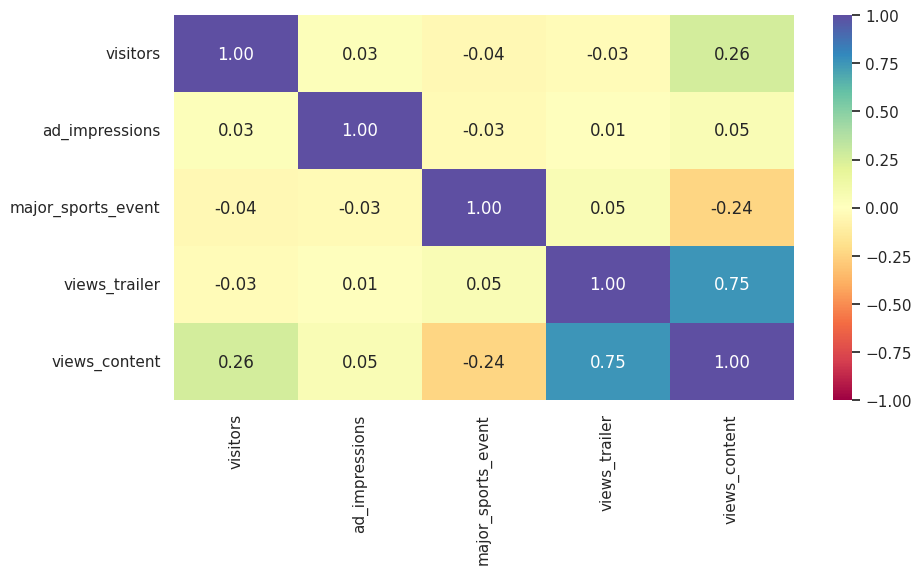

In [19]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
corr = df[num_cols].corr()

# plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**2.2. Bivariate Genre and Content Views**

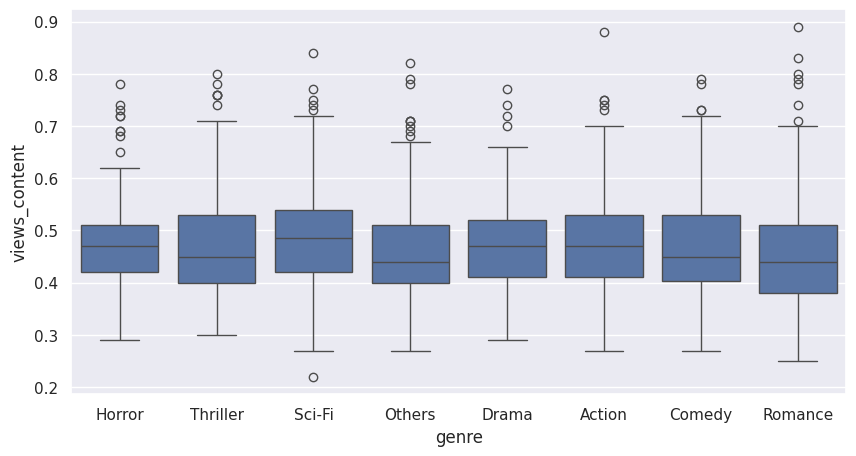

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_content")
plt.show()

**2.3. Bivariate Genre and Trailer Views**

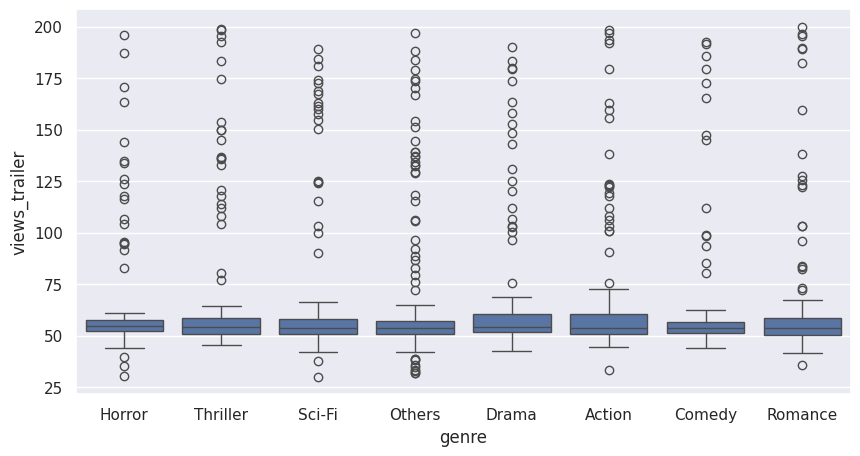

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_trailer")
plt.show()

**2.4. Bivariate Season and Content Views**

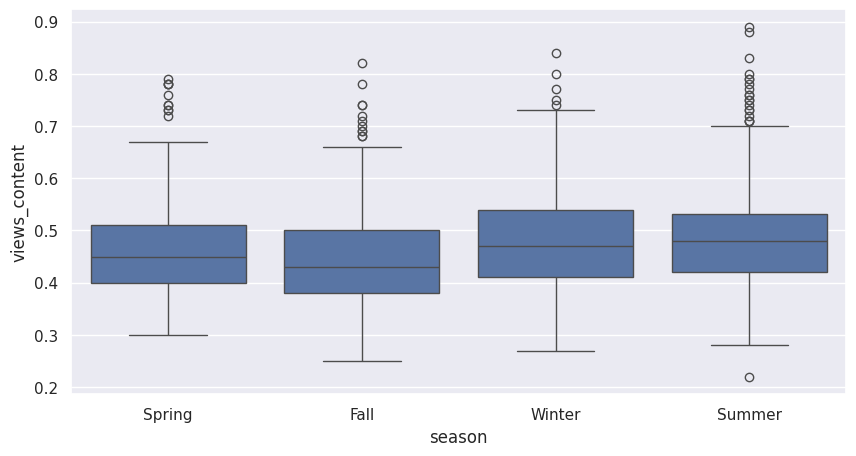

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="views_content")
plt.show()

2.5. Bivariate Major Sports Events and Content Views

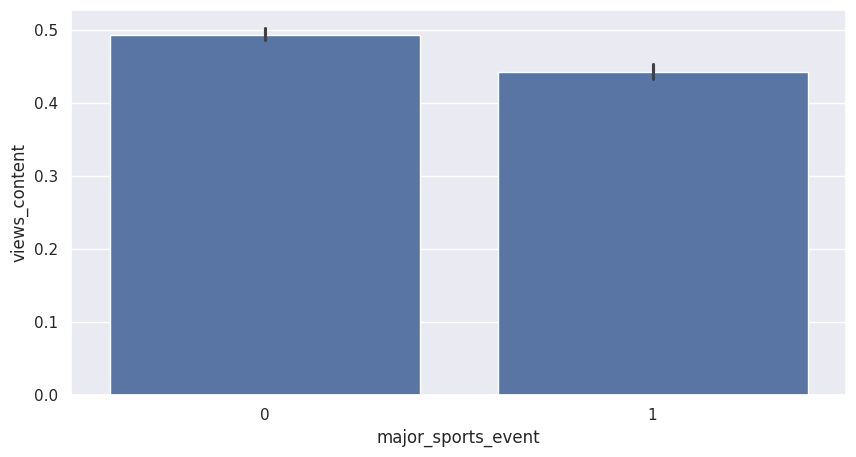

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="major_sports_event", y="views_content")
plt.show()

# **Key Questions**

**1. What does the distribution of content views look like?**

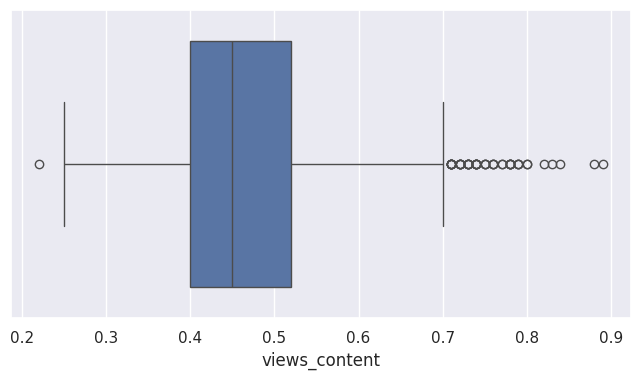

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="views_content")
plt.show()

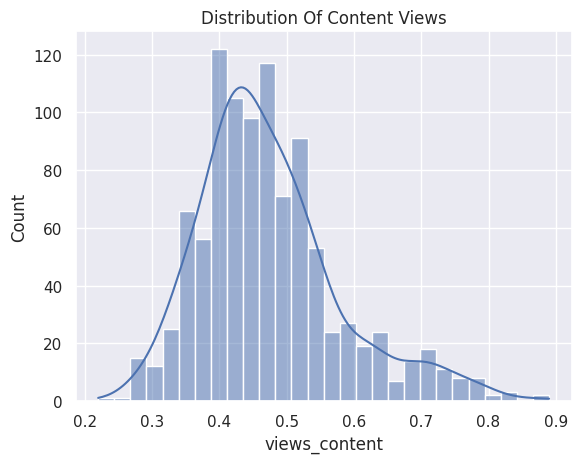

In [25]:
sns.histplot(data=df, x="views_content", kde=True)
plt.title("Distribution Of Content Views")
plt.show()

**2.What does the distribution of genres look like?**

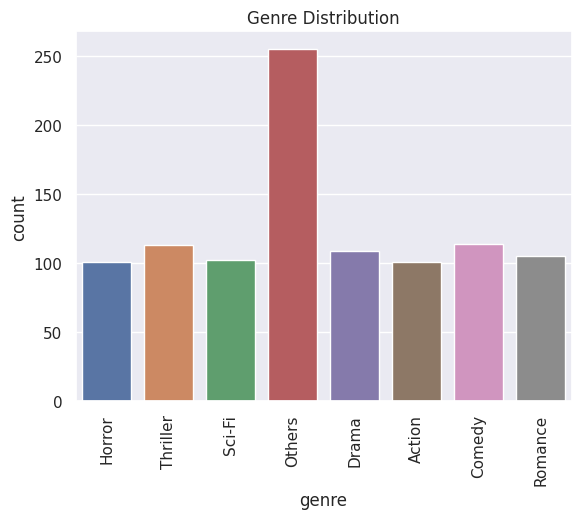

In [26]:
sns.countplot(data=df, x="genre", hue="genre")
plt.title("Genre Distribution")
plt.xticks(rotation=90)
plt.show()

**3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

<ipython-input-27-b38634cf74c8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="dayofweek", y="views_content", palette="Set1")


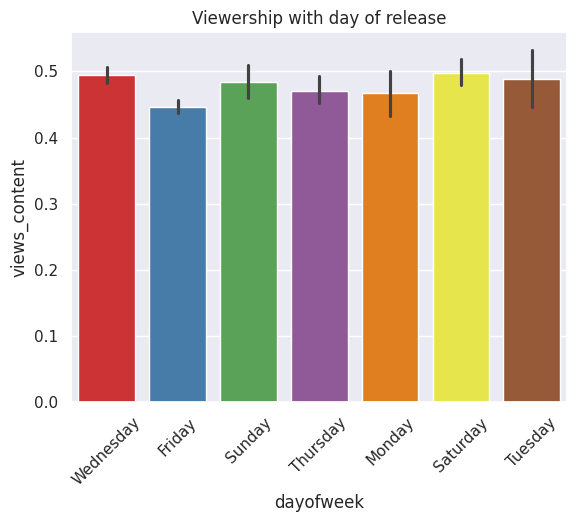

In [27]:
sns.barplot(data=df, x="dayofweek", y="views_content", palette="Set1")
plt.title("Viewership with day of release")
plt.xticks(rotation=45)
plt.show()

**4.How does the viewership vary with the season of release?**

<ipython-input-28-a47eab159cea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="season", y="views_content", palette="Set1")


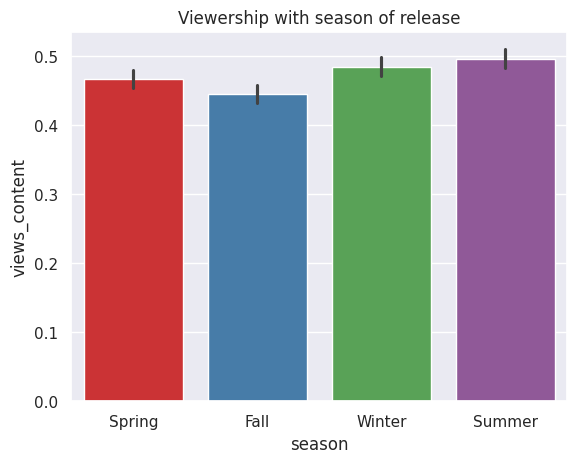

In [28]:
sns.barplot(data=df, x="season", y="views_content", palette="Set1")
plt.title("Viewership with season of release")
plt.show()

**5. What is the correlation between trailer views and content views?**

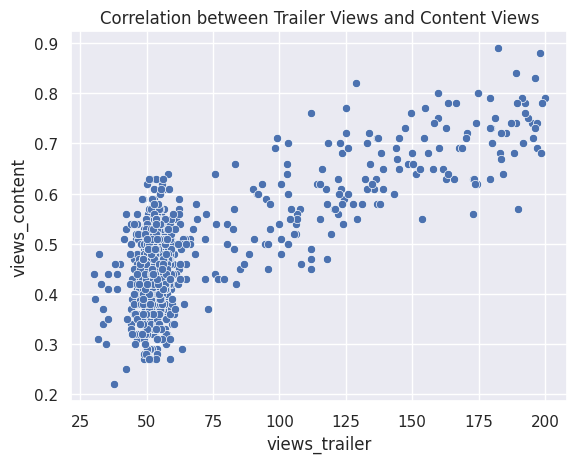

In [29]:
sns.scatterplot(data=df, x="views_trailer", y="views_content")
plt.title("Correlation between Trailer Views and Content Views")
plt.show()

# **Data Processing**

- Duplicate value check

In [30]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)


*   Missing Value Treartment



In [31]:
#Checking Missing values
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64



*    **Outlier Treatment**



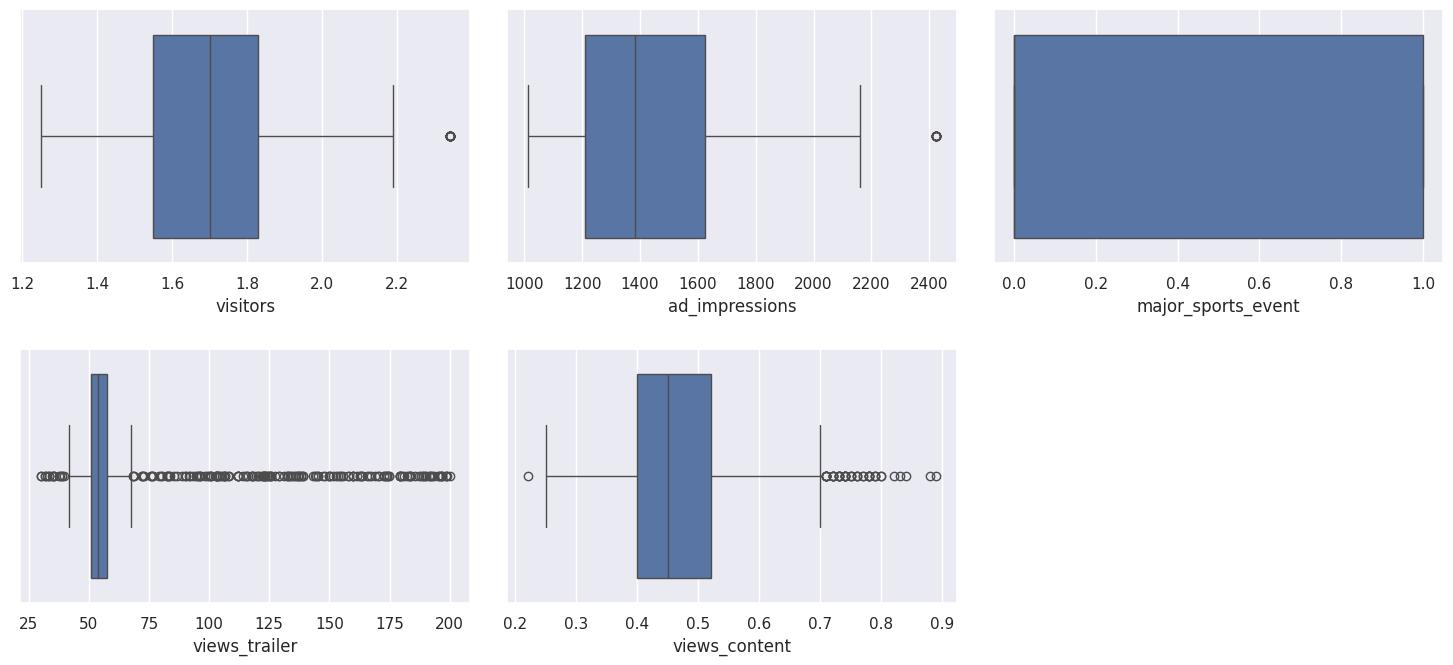

In [32]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   **Feature Engineering**




In [33]:
pd.get_dummies(data= df,columns=["genre","dayofweek","season"],drop_first=True)

visitors  ad_impressions  major_sports_event  views_trailer  \
0        1.67         1113.81                   0          56.70   
1        1.46         1498.41                   1          52.69   
2        1.47         1079.19                   1          48.74   
3        1.85         1342.77                   1          49.81   
4        1.46         1498.41                   0          55.83   
..        ...             ...                 ...            ...   
995      1.58         1311.96                   0          48.58   
996      1.34         1329.48                   0          72.42   
997      1.62         1359.80                   1         150.44   
998      2.06         1698.35                   0          48.72   
999      1.36         1140.23                   0          52.94   

     views_content  genre_Comedy  genre_Drama  genre_Horror  genre_Others  \
0             0.51         False        False          True         False   
1             0.32         False        False         False         False   
2             0.39         False        False         False         False   
3             0.44         False        False         False         False   
4             0.46         False        False         False         False   
..             ...           ...          ...           ...           ...   
995           0.36         False        False         False         False   
996           0.56         False        False         False         False   
997           0.66         False        False         False         False   
998           0.47         False        False         False         False   
999           0.49          True        False         False         False   

     genre_Romance  ...  genre_Thriller  dayofweek_Monday  dayofweek_Saturday  \
0            False  ...           False             False               False   
1            False  ...            True             False               False   
2            False  ...            True             False               False   
3            False  ...           False             False               False   
4            False  ...           False             False               False   
..             ...  ...             ...               ...                 ...   
995           True  ...           False             False               False   
996          False  ...           False             False               False   
997          False  ...           False             False               False   
998           True  ...           False              True               False   
999          False  ...           False             False                True   

     dayofweek_Sunday  dayofweek_Thursday  dayofweek_Tuesday  \
0               False               False              False   
1               False               False              False   
2               False               False              False   
3               False               False              False   
4                True               False              False   
..                ...                 ...                ...   
995             False               False              False   
996             False               False              False   
997             False               False              False   
998             False               False              False   
999             False               False              False   

     dayofweek_Wednesday  season_Spring  season_Summer  season_Winter  
0                   True           True          False          False  
1                  False          False          False          False  
2                   True          False          False          False  
3                  False          False          False          False  
4                  False          False          False           True  
..                   ...            ...            ...            ...  
995              



*   **Data preparation for modeling**




In [34]:
# defining X and y variables
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [35]:
# let's add the intercept to data
X = sm.add_constant(X)

In [36]:
# Convert all non-numeric (object or category) columns to dummy variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X.head()

const  visitors  ad_impressions  major_sports_event  views_trailer  \
0    1.0      1.67         1113.81                 0.0          56.70   
1    1.0      1.46         1498.41                 1.0          52.69   
2    1.0      1.47         1079.19                 1.0          48.74   
3    1.0      1.85         1342.77                 1.0          49.81   
4    1.0      1.46         1498.41                 0.0          55.83   

   genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  ...  \
0           0.0          0.0           1.0           0.0            0.0  ...   
1           0.0          0.0           0.0           0.0            0.0  ...   
2           0.0          0.0           0.0           0.0            0.0  ...   
3           0.0          0.0           0.0           0.0            0.0  ...   
4           0.0          0.0           0.0           0.0            0.0  ...   

   genre_Thriller  dayofweek_Monday  dayofweek_Saturday  dayofweek_Sunday  \
0             0.0               0.0                 0.0               0.0   
1             1.0               0.0                 0.0               0.0   
2             1.0               0.0                 0.0               0.0   
3             0.0               0.0                 0.0               0.0   
4             0.0               0.0                 0.0               1.0   

   dayofweek_Thursday  dayofweek_Tuesday  dayofweek_Wednesday  season_Spring  \
0                 0.0                0.0                  1.0            1.0   
1                 0.0                0.0                  0.0            0.0   
2                 0.0                0.0                  1.0            0.0   
3                 0.0                0.0                  0.0            0.0   
4                 0.0                0.0                  0.0            0.0   

   season_Summer  season_Winter  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            0.0  
4            0.0            1.0  

[5 rows x 21 columns]

In [37]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


# **Model building - Linear Regression**



*   **Build the model and comment on the model statistics**




In [39]:
# Ols model
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 11 May 2025   Prob (F-statistic):          1.32e-215
Time:                        10:53:42   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    



*   **Model Performance**



In [40]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  #
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [41]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model, x_train, y_train)
model_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.04853  0.038197   0.791616        0.785162  8.55644

In [42]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_test_perf = model_performance_regression(model, x_test, y_test)
model_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.050603  0.040782   0.766447        0.748804  9.030464



*    **Display model coefficients with column namest**



In [43]:
#model coefficeints with column names
pd.DataFrame(model.params, columns=["coef"])

coef
const                0.060157
visitors             0.129451
ad_impressions       0.000004
major_sports_event  -0.060326
views_trailer        0.002330
genre_Comedy         0.009352
genre_Drama          0.012625
genre_Horror         0.009862
genre_Others         0.006325
genre_Romance        0.000551
genre_Sci-Fi         0.013143
genre_Thriller       0.008708
dayofweek_Monday     0.033662
dayofweek_Saturday   0.057887
dayofweek_Sunday     0.036321
dayofweek_Thursday   0.017289
dayofweek_Tuesday    0.022837
dayofweek_Wednesday  0.047376
season_Spring        0.022602
season_Summer        0.044203
season_Winter        0.027161

# **Testing the assumptions of linear regression model**

# **1.No Multicollinearity**

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [45]:
checking_vif(x_train)

feature        VIF
0                 const  99.679317
1              visitors   1.027837
2        ad_impressions   1.029390
3    major_sports_event   1.065689
4         views_trailer   1.023551
5          genre_Comedy   1.917635
6           genre_Drama   1.926699
7          genre_Horror   1.904460
8          genre_Others   2.573779
9         genre_Romance   1.753525
10         genre_Sci-Fi   1.863473
11       genre_Thriller   1.921001
12     dayofweek_Monday   1.063551
13   dayofweek_Saturday   1.155744
14     dayofweek_Sunday   1.150409
15   dayofweek_Thursday   1.169870
16    dayofweek_Tuesday   1.062793
17  dayofweek_Wednesday   1.315231
18        season_Spring   1.541591
19        season_Summer   1.568240
20        season_Winter   1.570338

In [46]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        # Keep index using .reindex()
        # Drop columns starting with 'cols' and keep the original index
        train = predictors.drop(columns=[c for c in predictors.columns if c.startswith(cols)], errors='ignore')

        # Replace infinite values with NaN
        train.replace([np.inf, -np.inf], np.nan, inplace=True)
        # Drop rows with NaN values, and sync target with predictors

        #Reset index of train and target to avoid misalignment
        train = train.reset_index(drop=True)
        target = target.reset_index(drop=True)

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [47]:
col_list = ["genre_Others"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  genre_Others                            0.78554                 0.049268

In [48]:
col_to_drop = "genre_Others"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  genre_Others


feature        VIF
0                 const  87.570676
1              visitors   1.022226
2        ad_impressions   1.028804
3    major_sports_event   1.065264
4         views_trailer   1.020524
5          genre_Comedy   1.204848
6           genre_Drama   1.223443
7          genre_Horror   1.204654
8         genre_Romance   1.171988
9          genre_Sci-Fi   1.205594
10       genre_Thriller   1.206560
11     dayofweek_Monday   1.063551
12   dayofweek_Saturday   1.154886
13     dayofweek_Sunday   1.150034
14   dayofweek_Thursday   1.169852
15    dayofweek_Tuesday   1.058831
16  dayofweek_Wednesday   1.314380
17        season_Spring   1.541573
18        season_Summer   1.545311
19        season_Winter   1.568494

In [49]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 11 May 2025   Prob (F-statistic):          1.66e-216
Time:                        10:54:06   Log-Likelihood:                 1124.2
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     680   BIC:                            -2117.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0660    

**Dealing with high p-value variables**

In [50]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [51]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [52]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 11 May 2025   Prob (F-statistic):          7.03e-224
Time:                        10:54:10   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [53]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.048841  0.038385   0.788937        0.785251  8.595246

In [54]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.051109  0.041299   0.761753        0.751792  9.177097

# **2.Linearity and Independence of variables**

In [55]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
731           0.40       0.445434  -0.045434
716           0.70       0.677403   0.022597
640           0.42       0.433999  -0.013999
804           0.55       0.562030  -0.012030
737           0.59       0.547786   0.042214

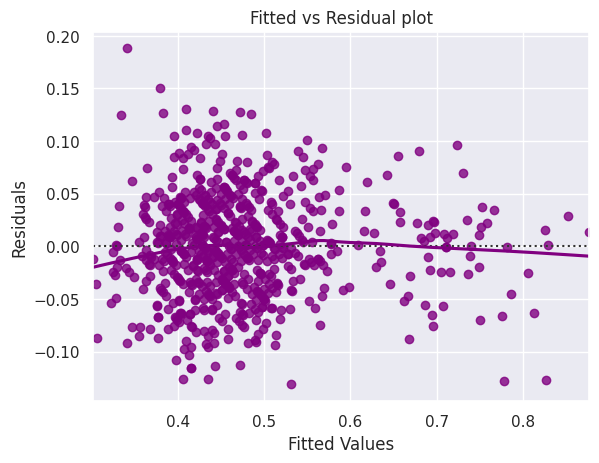

In [56]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

# **4.Normality of error terms**

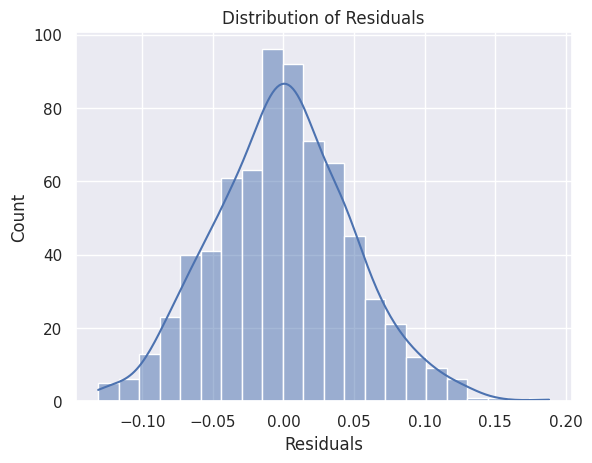

In [57]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Distribution of Residuals")
plt.show()

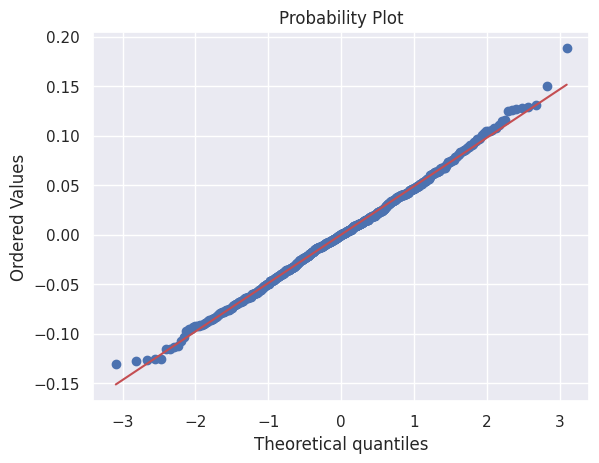

In [58]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [59]:
# Shapiro-Wilk Test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9973155427169242), pvalue=np.float64(0.31085896470071894))

# **4.Test for Homoscedasticity**

In [60]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', np.float64(1.1313612904200752)),
 ('p-value', np.float64(0.12853551819087372))]

# **Model performance evaluation**



* **Final Model**


In [61]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [62]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 11 May 2025   Prob (F-statistic):          7.03e-224
Time:                        10:56:15   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [63]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.048841  0.038385   0.788937        0.785251  8.595246

In [64]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.051109  0.041299   0.761753        0.751792  9.177097